In [4]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os


In [5]:
model_path = "model_vgg16_buah.h5"
label_map_path = "label_map.json"

# Load model
model = load_model(model_path)
model.summary()

# Load label map
with open(label_map_path, "r") as f:
    label_map = json.load(f)

class_names = list(label_map.keys())
print("Class Mapping:", label_map)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_1          │ (None, 512)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,588 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2 (12.00 B)

Class Mapping: {'Banana__Healthy': 0, 'Banana__Rotten': 1, 'Carrot__Healthy': 2, 'Carrot__Rotten': 3, 'Cucumber__Healthy': 4, 'Cucumber__Rotten': 5, 'Potato__Healthy': 6, 'Potato__Rotten': 7, 'Tomato__Healthy': 8, 'Tomato__Rotten': 9}


In [6]:
test_dir = r"E:\Folder kuliah\smstr7\TA1\klasifikasi-buah\test"

img_height = 128
img_width = 128
batch_size = 32

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


Found 1239 images belonging to 10 classes.


In [7]:
test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print(f"\n✅ Akurasi Testing: {test_acc * 100:.2f}%")
print(f"✅ Loss Testing: {test_loss:.4f}")


C:\PythonPackages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/39 ━━━━━━━━━━━━━━━━━━━━ 7s 786ms/step - accuracy: 0.8218 - loss: 0.4463

c:\ProgramData\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


39/39 ━━━━━━━━━━━━━━━━━━━━ 32s 794ms/step - accuracy: 0.8209 - loss: 0.4675

✅ Akurasi Testing: 81.44%
✅ Loss Testing: 0.5400


In [8]:
preds = model.predict(test_generator, verbose=1)
y_pred = np.argmax(preds, axis=1)
y_true = test_generator.classes


39/39 ━━━━━━━━━━━━━━━━━━━━ 25s 628ms/step


In [9]:
print("\n📌 Classification Report:")
print(classification_report(
    y_true, 
    y_pred, 
    target_names=test_generator.class_indices.keys()
))



📌 Classification Report:
                   precision    recall  f1-score   support

  Banana__Healthy       0.89      0.66      0.76        99
   Banana__Rotten       0.90      0.96      0.93       420
  Carrot__Healthy       0.76      0.73      0.74        93
   Carrot__Rotten       0.67      0.56      0.61        87
Cucumber__Healthy       0.92      0.84      0.87        91
 Cucumber__Rotten       0.82      0.84      0.83        89
  Potato__Healthy       0.74      0.83      0.78        92
   Potato__Rotten       0.52      0.62      0.57        88
  Tomato__Healthy       0.92      0.74      0.82        91
   Tomato__Rotten       0.75      0.84      0.79        89

         accuracy                           0.81      1239
        macro avg       0.79      0.76      0.77      1239
     weighted avg       0.82      0.81      0.81      1239



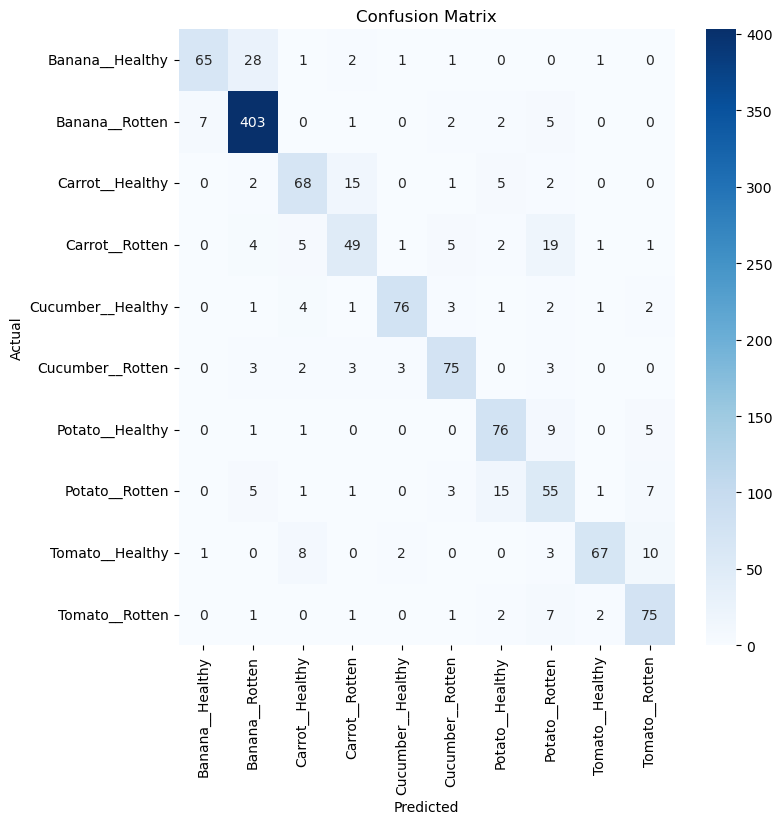

In [10]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(
    cm, annot=True, fmt='g', cmap='Blues',
    xticklabels=test_generator.class_indices.keys(),
    yticklabels=test_generator.class_indices.keys()
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
